## 267 - Putting it all together - Part 1

[Youtube](https://www.youtube.com/watch?v=yQc5ThjZGtg)

In [1]:
import metpy
import xarray as xr
from datetime import datetime
from siphon.catalog import TDSCatalog
from xarray.backends import NetCDF4DataStore
from metpy.plots import ContourPlot, MapPanel, PanelContainer
from metpy.units import units

In [2]:
cat = TDSCatalog('https://thredds-test.unidata.ucar.edu/thredds/catalog/grib/NCEP/GFS/Global_0p5deg/catalog.xml')
cat.datasets

['Full Collection (Reference / Forecast Time) Dataset', 'Best GFS Half Degree Forecast Time Series', 'Latest Collection for GFS Half Degree Forecast']

In [3]:
ncss = cat.datasets['Best GFS Half Degree Forecast Time Series'].subset()

In [4]:
query = ncss.query()
query.time(datetime(2023, 1, 17))
query.accept('netcdf')
query.variables('Geopotential_height_isobaric', 'u-component_of_wind_isobaric', 'v-component_of_wind_isobaric')
query.add_lonlat()

var=v-component_of_wind_isobaric&var=u-component_of_wind_isobaric&var=Geopotential_height_isobaric&time=2023-01-17T00%3A00%3A00&accept=netcdf&addLatLon=True

In [5]:
ds = ncss.get_data(query)
ds = xr.open_dataset(NetCDF4DataStore(ds)).metpy.parse_cf()
ds

<xarray.Dataset>
Dimensions:                         (time: 1, latitude: 361, isobaric: 41,
                                     longitude: 720)
Coordinates:
    reftime                         (time) datetime64[ns] 2023-01-17
  * latitude                        (latitude) float32 90.0 89.5 ... -89.5 -90.0
  * time                            (time) datetime64[ns] 2023-01-17
  * isobaric                        (isobaric) float64 1.0 2.0 ... 1e+05
  * longitude                       (longitude) float32 0.0 0.5 ... 359.0 359.5
    metpy_crs                       object Projection: latitude_longitude
Data variables:
    u-component_of_wind_isobaric    (time, isobaric, latitude, longitude) float32 ...
    v-component_of_wind_isobaric    (time, isobaric, latitude, longitude) float32 ...
    Geopotential_height_isobaric    (time, isobaric, latitude, longitude) float32 ...
    LatLon_361X720-0p25S-180p00E-2  int32 ...
Attributes: (12/13)
    Originating_or_generating_Center:                                        ...
    Originating_or_generating_Subcenter:                                     ...
    GRIB_table_version:                                                      ...
    Type_of_generating_process:                                              ...
    Analysis_or_forecast_generating_process_identifier_defined_by_originating...
    Conventions:                                                             ...
    ...                                                                                ...
    featureType:                                                             ...
    History:                                                                 ...
    geospatial_lat_min:                                                      ...
    geospatial_lat_max:                                                      ...
    geospatial_lon_min:                                                      ...
    geospatial_lon_max:                                                      ...

/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:256: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/home/jessica/anaconda3/lib/python3.9/site-p

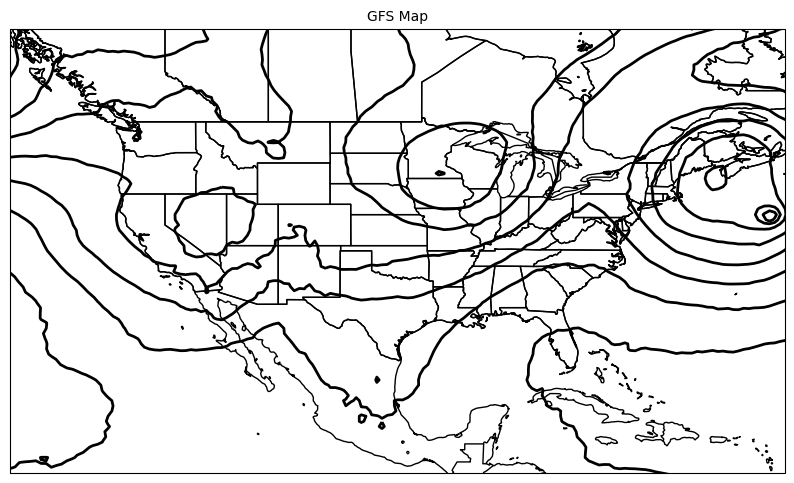

In [6]:
contour = ContourPlot()
contour.data = ds
contour.field = 'Geopotential_height_isobaric'
contour.level = 850 * units.hPa
contour.linecolor = 'black'
contour.contours = 30

panel = MapPanel()
panel.area = (-135, -60, 15, 58)
panel.layers = ['coastline', 'borders', 'states']
panel.title = 'GFS Map'
panel.plots = [contour]

pc = PanelContainer()
pc.size = (10, 8)
pc.panels = [panel]
pc.show()